In [5]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import datetime as dt

In [6]:
# Download stock data
def get_stock_data(ticker):
    end_date = dt.datetime.now()
    start_date = end_date - dt.timedelta(days=365*6)  # 6 years of data
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data = stock_data[['Close']]  # Using 'Close' price for prediction
    return stock_data

# Prepare data
def prepare_data(stock_data):
    stock_data['Target'] = stock_data['Close'].shift(-1)  # Predict next day
    stock_data.dropna(inplace=True)
    X = stock_data[['Close']]
    y = stock_data['Target']
    return train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale features
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [7]:
# Train and evaluate models
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "SVR": SVR(kernel='rbf', C=100, gamma=0.1),
        "Random Forest": RandomForestRegressor(n_estimators=100),
        "Decision Tree": DecisionTreeRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "KNN": KNeighborsRegressor(n_neighbors=5)
    }
    
    results = {}
    plt.figure(figsize=(12, 6))
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        results[name] = mse
        plt.plot(predictions, label=f"{name} Predictions")
    
    plt.plot(y_test.values, label="True Values", color='black', linewidth=2)
    plt.legend()
    plt.show()
    
    return models, results

In [8]:
# Function to predict next day price
def predict_next_day(models, scaler, latest_data):
    next_day_predictions = {}
    
    # Reshape the latest price data and scale it
    latest_data_scaled = scaler.transform(latest_data.values.reshape(-1, 1))
    
    for name, model in models.items():
        next_day_price = model.predict(latest_data_scaled)
        next_day_predictions[name] = next_day_price[0]
    
    return next_day_predictions

In [9]:
# Main workflow
ticker = 'AAPL'  # Example stock ticker
stock_data = get_stock_data(ticker)

[*********************100%%**********************]  1 of 1 completed


In [10]:
# Show the head of the dataframe
print("Head of the DataFrame:")
print(stock_data.head())

Head of the DataFrame:
                Close
Date                 
2018-09-26  55.105000
2018-09-27  56.237499
2018-09-28  56.435001
2018-10-01  56.814999
2018-10-02  57.320000


In [11]:
# Show today's price (latest price)
print("\nToday's Price (latest available closing price):", stock_data['Close'][-1])


Today's Price (latest available closing price): 226.47000122070312


C:\Users\Deepraj\AppData\Local\Temp\ipykernel_28456\3890157713.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("\nToday's Price (latest available closing price):", stock_data['Close'][-1])


C:\Users\Deepraj\AppData\Local\Temp\ipykernel_28456\78262700.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Target'] = stock_data['Close'].shift(-1)  # Predict next day
C:\Users\Deepraj\AppData\Local\Temp\ipykernel_28456\78262700.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.dropna(inplace=True)


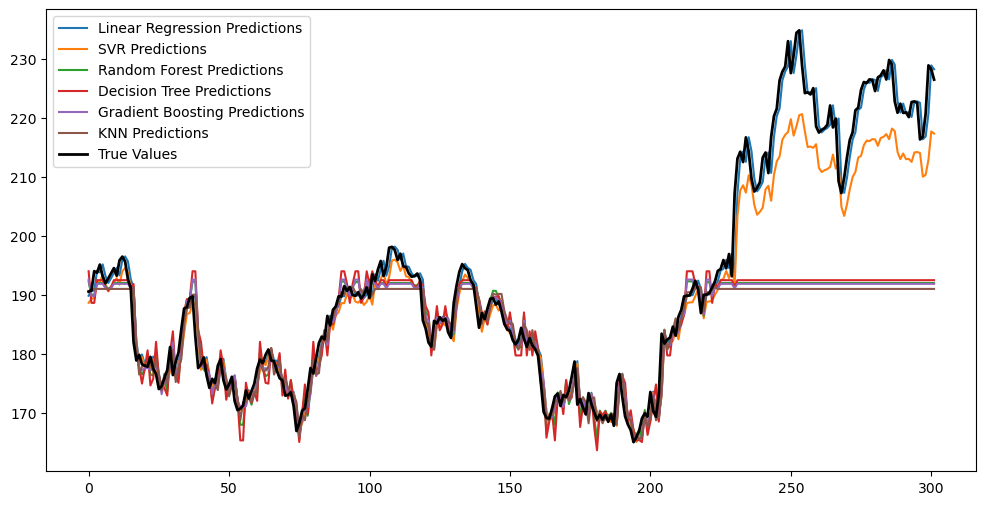

In [12]:
X_train, X_test, y_train, y_test = prepare_data(stock_data)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)
models, results = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)

In [13]:
# Predict the next day price
latest_data = stock_data[['Close']].iloc[-1]  # Latest available data point for the next day prediction
next_day_predictions = predict_next_day(models, StandardScaler().fit(X_train), latest_data)

c:\Users\Deepraj\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
print("\nNext Day Price Predictions (by each model):")
for model_name, price in next_day_predictions.items():
    print(f"{model_name}: {price}")


Next Day Price Predictions (by each model):
Linear Regression: 228.2161410390113
SVR: 217.31684126334147
Random Forest: 191.9790037536621
Decision Tree: 192.4600067138672
Gradient Boosting: 191.83867201381466
KNN: 190.97799987792968


In [15]:
print("\nMean Squared Error for each model:")
print(results)


Mean Squared Error for each model:
{'Linear Regression': 7.41048113754771, 'SVR': 24.81637164986662, 'Random Forest': 215.69994251935154, 'Decision Tree': 210.99067263137388, 'Gradient Boosting': 217.3050212747899, 'KNN': 229.82155090553798}
